<a href="https://www.kaggle.com/code/manpreetkbuttar/nyc-taxi-trip-details-eda?scriptVersionId=162317649" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# importing libraries
import pandas as pd  # data processing
import numpy as np   # linear algebra
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import datetime as dt

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
#importing data
data = pd.read_csv('/kaggle/input/nyc-taxi-trip-duration/nyc_taxi_trip_duration.csv')

In [3]:
#first 5 observations using "head()" function
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
#last 5 observations using "tail()" function
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [5]:
#finding out the shape of the data using "shape" method: Output (rows, columns)
data.shape

(729322, 11)

In [6]:
#Printing all the columns present in data
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

## Check for null values, unique values and stats summary

In [7]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There are no null values, missing value imputation is not needed

In [8]:
data.nunique() # chcek for unique values

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [9]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


Analysis : 
* Count is same as data shape
* Vendor id has min value as 1 and max as 2 and has 2 values only
* Passenger count has a minimum of 0 (and max 9) which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.
* The trip duration values dispersed. We will come back to this later during Univariate Analysis.

In [10]:
data['store_and_fwd_flag'].unique() # it is a categorical variable

array(['N', 'Y'], dtype=object)

In [11]:
data['store_and_fwd_flag'].nunique()

2

## Variable Identification and Typecasting

In [12]:
# A closer look at the data types present in the data
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Summary:

* **id** - has same no of rows as data size so it is unique for each trip **Can be integer or object**
* **vendor_id** - a code indicating the provider associated with the trip record **okay as integer, values are 1,2 only**
* **pickup_datetime** - date and time when the meter was engaged **Should be datetimee**
* **dropoff_datetime** - date and time when the meter was disengaged **Should be datetimee**
* **passenger_count** - the number of passengers in the vehicle (driver entered value)  **Okay as Integer**
* **pickup_longitude** - the longitude where the meter was engaged **Okay as float**
* **pickup_latitude** - the latitude where the meter was engaged **Okay as float**
* **dropoff_longitude** - the longitude where the meter was disengaged **Okay as float**
* **dropoff_latitude** - the latitude where the meter was disengaged **Okay as float**
* **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)  **Categorical value, can use get_dummies if needed **

* **trip_duration** - (target) duration of the trip in seconds


## Typecasting

In [13]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category') 
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [14]:
# Verify the updated datatype
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

In [15]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()

data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday

data['pickup_month']=data['pickup_datetime'].dt.month_name()
data['dropoff_month']=data['dropoff_datetime'].dt.month_name()

data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour

data['pickup_minute']=data['pickup_datetime'].dt.minute
data['dropoff_minute']=data['dropoff_datetime'].dt.minute

In [16]:
data[['pickup_datetime','dropoff_datetime','pickup_day','dropoff_day','pickup_day_no','dropoff_day_no','pickup_month','dropoff_month','pickup_hour','dropoff_hour','pickup_minute','dropoff_minute']].head()

,pickup_datetime,dropoff_datetime,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute
0,2016-02-29 16:40:21,2016-02-29 16:47:01,Monday,Monday,0,0,February,February,16,16,40,47
1,2016-03-11 23:35:37,2016-03-11 23:53:57,Friday,Friday,4,4,March,March,23,23,35,53
2,2016-02-21 17:59:33,2016-02-21 18:26:48,Sunday,Sunday,6,6,February,February,17,18,59,26
3,2016-01-05 09:44:31,2016-01-05 10:03:32,Tuesday,Tuesday,1,1,January,January,9,10,44,3
4,2016-02-17 06:42:23,2016-02-17 06:56:31,Wednesday,Wednesday,2,2,February,February,6,6,42,56


In [17]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [18]:
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday']=data['dropoff_hour'].apply(time_of_day)

In [19]:
data[['pickup_datetime','dropoff_datetime','pickup_day','dropoff_day','pickup_day_no','dropoff_day_no','pickup_month','dropoff_month','pickup_hour','dropoff_hour','pickup_minute','dropoff_minute','pickup_timeofday','dropoff_timeofday']].head()

,pickup_datetime,dropoff_datetime,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,pickup_timeofday,dropoff_timeofday
0,2016-02-29 16:40:21,2016-02-29 16:47:01,Monday,Monday,0,0,February,February,16,16,40,47,Evening,Evening
1,2016-03-11 23:35:37,2016-03-11 23:53:57,Friday,Friday,4,4,March,March,23,23,35,53,Late night,Late night
2,2016-02-21 17:59:33,2016-02-21 18:26:48,Sunday,Sunday,6,6,February,February,17,18,59,26,Evening,Evening
3,2016-01-05 09:44:31,2016-01-05 10:03:32,Tuesday,Tuesday,1,1,January,January,9,10,44,3,Morning,Morning
4,2016-02-17 06:42:23,2016-02-17 06:56:31,Wednesday,Wednesday,2,2,February,February,6,6,42,56,Morning,Morning


In [20]:
!pip install geopy

In [21]:
from geopy.distance import great_circle

In [22]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
    start_coordinates=(pickup_lat,pickup_long)
    stop_coordinates=(dropoff_lat,dropoff_long)
    return great_circle(start_coordinates,stop_coordinates).km


In [23]:
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)


In [24]:
data['average_speed'] = data['distance']/(data['trip_duration']/3600)

In [25]:
data.shape

(729322, 25)

# Univariate Analysis

## Numerical datatypes


In [26]:
data.select_dtypes(include=['int64','float64','Int64']).dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
distance             float64
average_speed        float64
dtype: object

In [27]:
# Categorical datatypes
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

id                            object
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
store_and_fwd_flag          category
pickup_day                    object
dropoff_day                   object
pickup_day_no                  int32
dropoff_day_no                 int32
pickup_month                  object
dropoff_month                 object
pickup_hour                    int32
dropoff_hour                   int32
pickup_minute                  int32
dropoff_minute                 int32
pickup_timeofday              object
dropoff_timeofday             object
dtype: object

In [28]:
data_numerical = data.select_dtypes(include=['int64', 'float64', 'Int64'])

In [29]:
data_cate=data.select_dtypes(exclude=['int64', 'float64', 'Int64'])

In [30]:
data.shape, data_cate.shape, data_numerical.shape

((729322, 25), (729322, 16), (729322, 9))

In [31]:
data_numerical.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,average_speed
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,3.441144,14.421469
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,4.353138,12.341045
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0.000000,0.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,1.232697,9.124323
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,2.095675,12.796846
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,3.876487,17.843942
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,1240.910430,5640.501953


In [32]:
def UVA_category(data, var_group, max_categories=10):
    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print the value_counts and barplot for max_categories.
    '''
    # setting figure_size
    num_subplots = len(var_group)

    # Create a subplot grid based on the number of variables
    rows = 1
    cols = num_subplots
      
    figsize = (7 * num_subplots, 5) if num_subplots <= 2 else (20, 5 * rows)
    plt.figure(figsize=figsize, dpi=100)

    # Adjust subplot grid for better layout
    if num_subplots > 2:
        rows = (num_subplots // 2) + (num_subplots % 2)
        cols = 2
        figsize = (20, 5 * rows)

    # Create the subplot grid
    figure, ax = plt.subplots(rows, cols, figsize=figsize)
    # Flatten the axes if there is more than one row
    ax = ax.flatten()

    # Iterate over variables
    for i, variable in enumerate(var_group):
        # Create countplot for the current variable
        sns.countplot(x=variable, data=data, ax=ax[i])
        ax[i].set_title(f'Number of {variable}s')

        # Add count values on top of each bar in the countplot
        for p in ax[i].patches:
            ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Display the plot
    plt.show()

### Value count for Vendor id , Passenger count and store and fwd flag

<Figure size 2000x500 with 0 Axes>

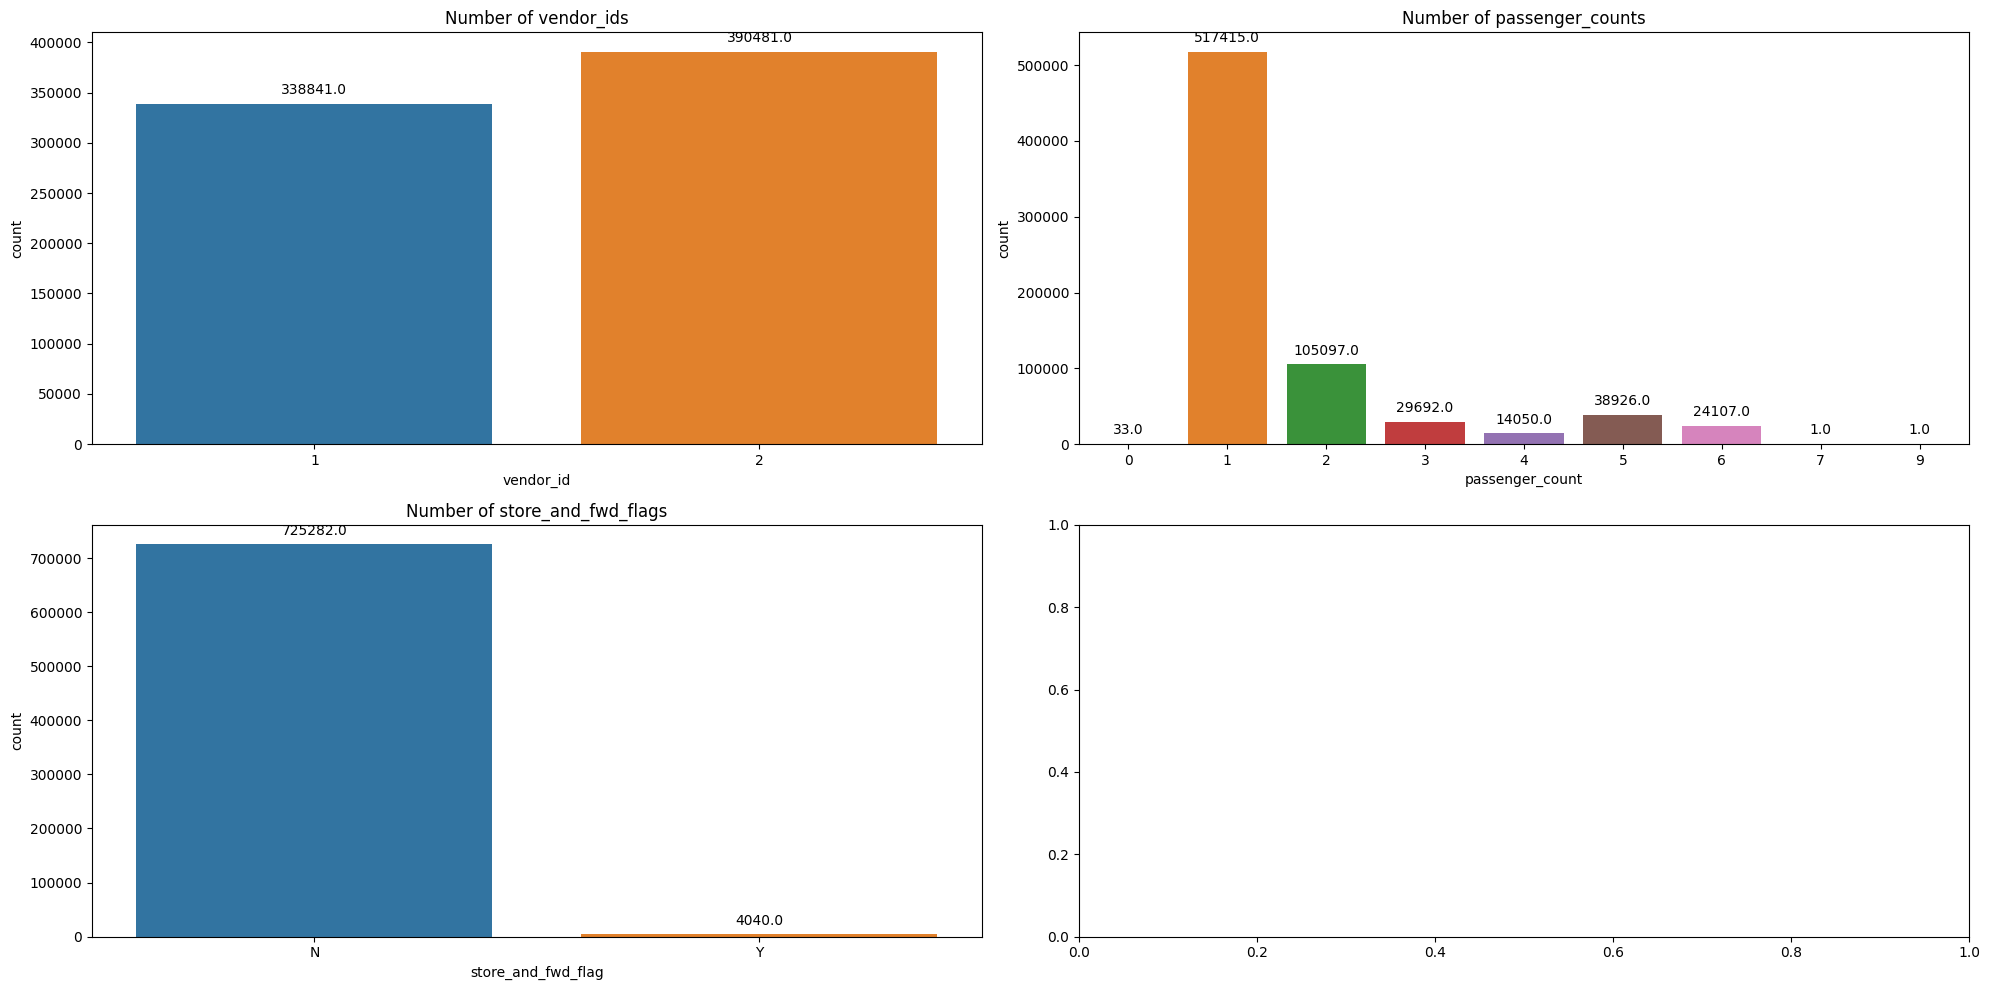

In [33]:
UVA_category(data, ['vendor_id', 'passenger_count', 'store_and_fwd_flag'])

In [34]:
data['store_and_fwd_flag'].value_counts(normalize=True)

store_and_fwd_flag
N    0.994461
Y    0.005539
Name: proportion, dtype: float64

#### Inferences:
##### Vendor_id:
* Distribution of vendor id is not much different. vendor 2 has slightly more count then 1
##### passenger_count:
* Instance of large group travelling together is rare
* There are 33 zero passenger trips
* Single  trip with 7 or 9 passengers
##### store_and_fwd_flag
* Inference: less than 1 percent trips are not recorded

In [35]:
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

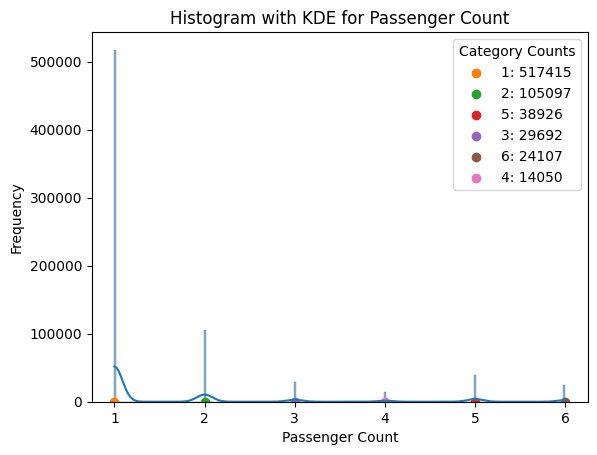

In [36]:
sns.histplot(data['passenger_count'],kde=True)
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Histogram with KDE for Passenger Count')

passenger_counts = data['passenger_count']
count_per_category = passenger_counts.value_counts()

# Adding red scatter points for each category
for category, count in count_per_category.items():
    plt.scatter([category], [passenger_counts[passenger_counts == category].max()], label=f'{category}: {count}')

 # Show the legend
plt.legend()
plt.legend().set_title('Category Counts')
# Display the plot
plt.show()

<Figure size 1400x500 with 0 Axes>

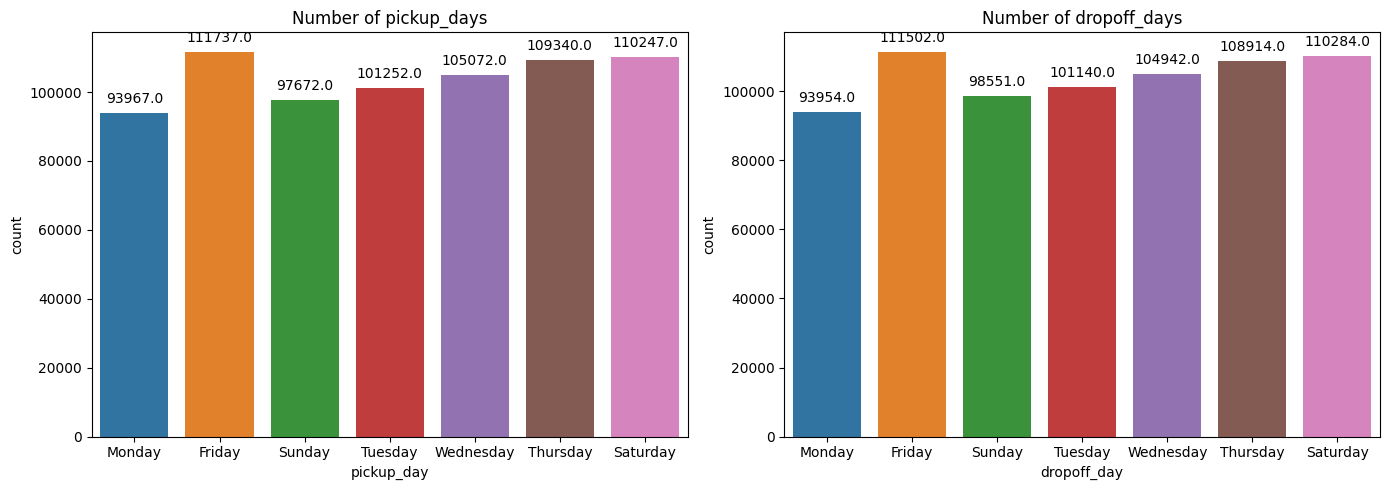

In [37]:
UVA_category(data, ['pickup_day', 'dropoff_day'])

<Figure size 1400x500 with 0 Axes>

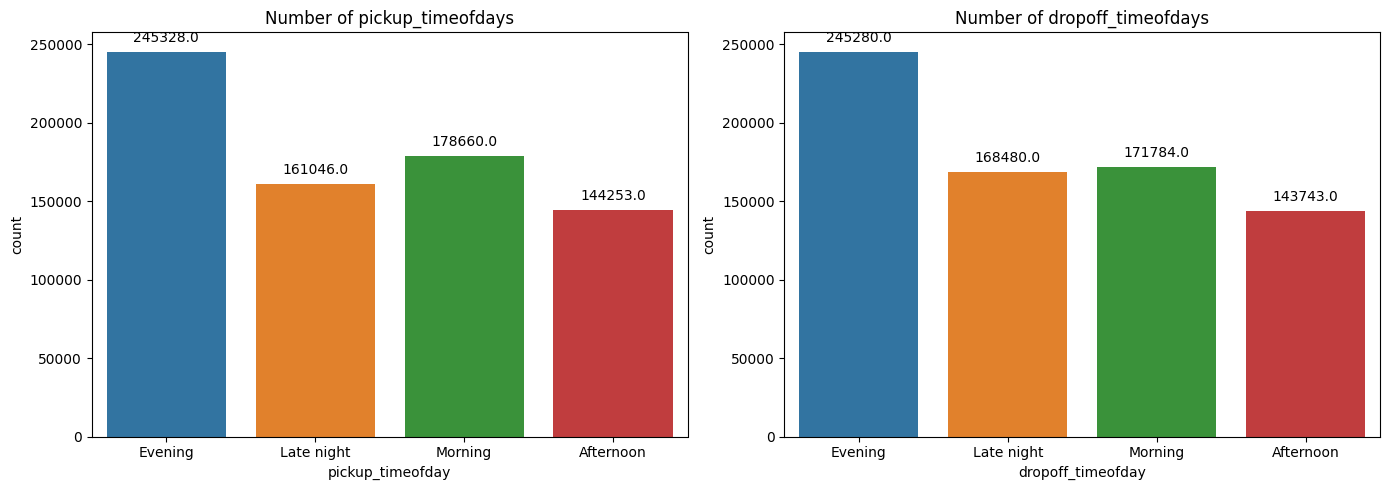

In [38]:
UVA_category(data, ['pickup_timeofday', 'dropoff_timeofday'])

<Figure size 1400x500 with 0 Axes>

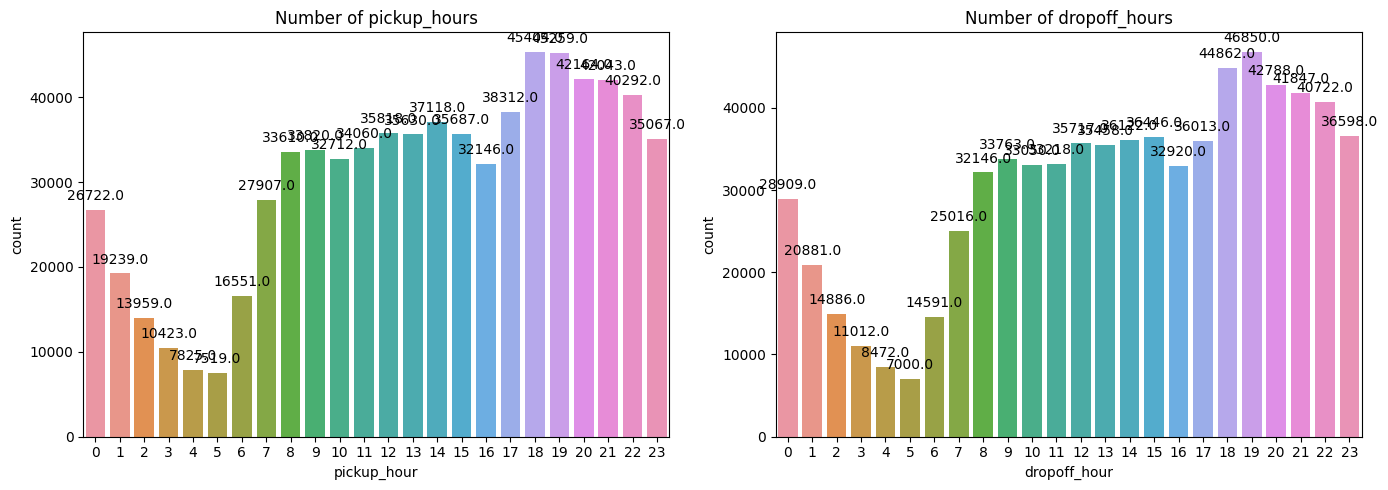

In [39]:
UVA_category(data, ['pickup_hour', 'dropoff_hour'])

<Figure size 1400x500 with 0 Axes>

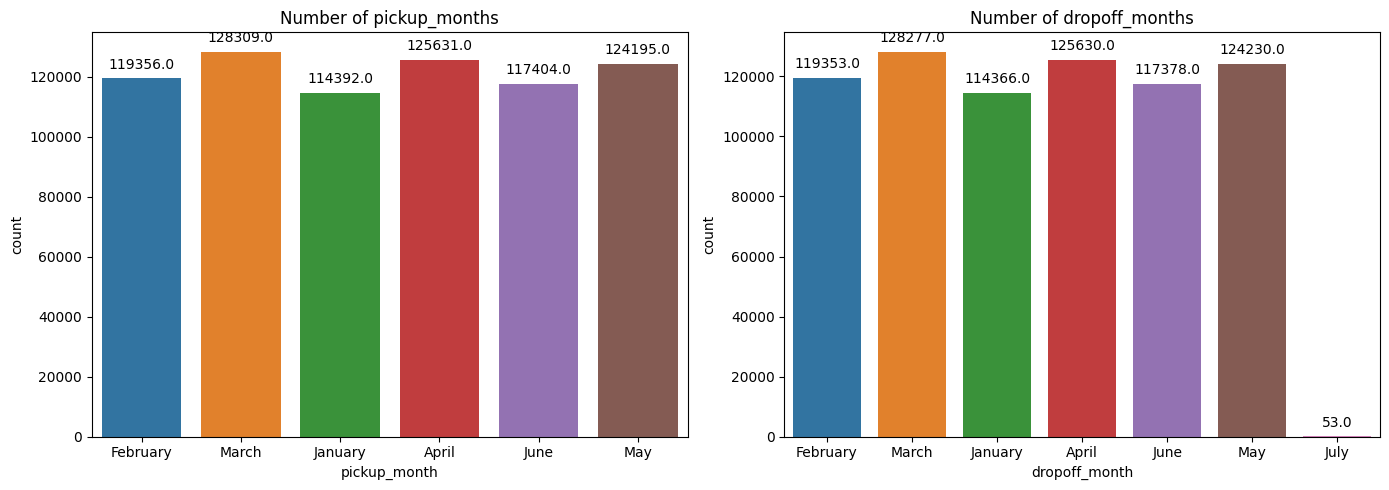

In [40]:
UVA_category(data, ['pickup_month', 'dropoff_month'])

#### Inferences: 
* Evenings are peak hours from 1800-1900. Early morning 0400 -0500 is least busy time.
* Fridays are most busy and Sundays are least.
* March has most trips followed by april and may. January has least trips. 

### Distribution of longitude/latitude

In [41]:
def plot_histogram_subplots(data, columns, figsize=(10, 10)):
    """
    Plot histograms for specified columns in a 2x2 subplot grid.

    Parameters:
    - data: DataFrame
    - columns: List of column names to plot
    - figsize: Tuple, optional, default is (10, 10)
    """
    # Create a 2x2 subplot
    figure, ax = plt.subplots(nrows=2, ncols=2, figsize=figsize)

    # Flatten the axes
    ax = ax.flatten()

    # Iterate over columns and plot histograms
    for i, column in enumerate(columns):
        sns.histplot(data[column], ax=ax[i])
        ax[i].set_xlabel(column)
        if i % 2 == 0:
            ax[i].set_ylabel('Frequency')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Display the plot
    plt.show()


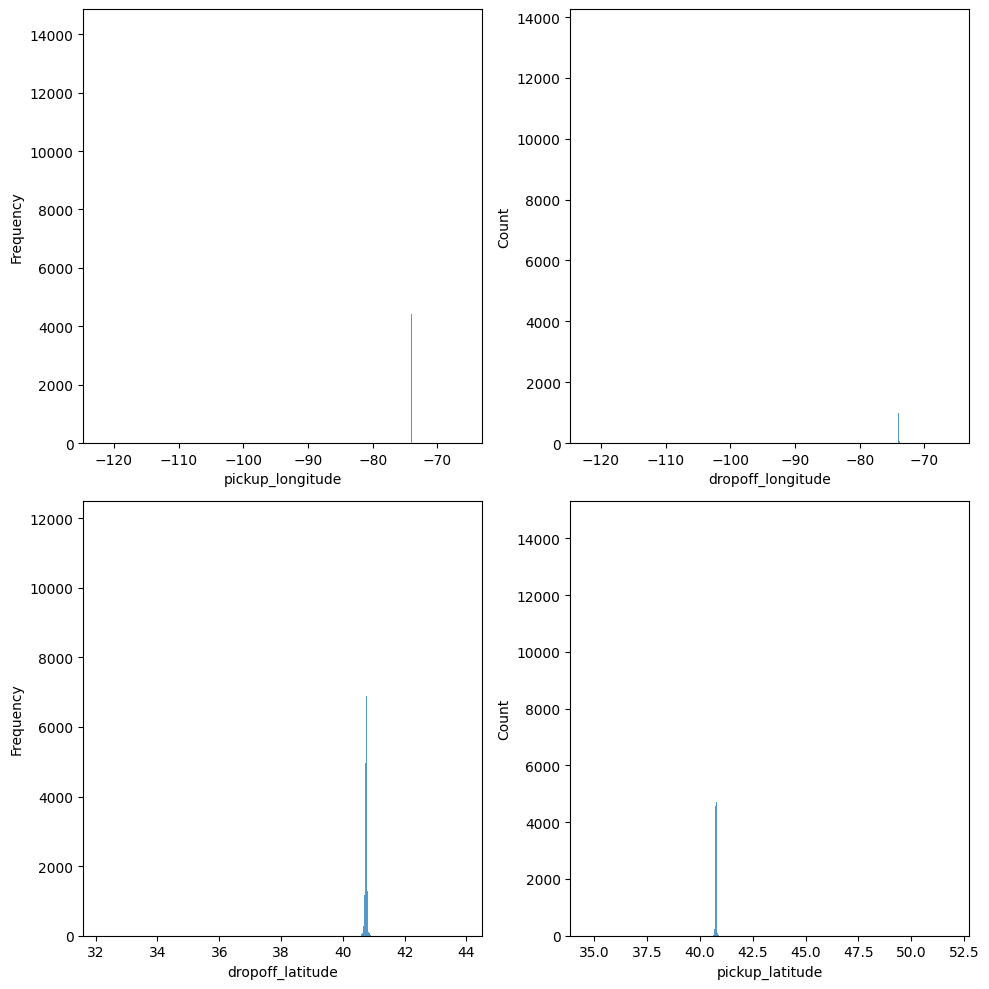

In [42]:
plot_histogram_subplots(data, ['pickup_longitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_latitude'])

Inference :
    logitudes distribution is similar for pickup and drop off whereas latitudes have different distribution

In [43]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
    ''' 
    Univariate_Analysis_numeric
    takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
    '''

    size = len(var_group)
    plt.figure(figsize = (7*size,4), dpi = 100)

    #looping for each variable
    for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
        mini = round(data[i].min(), 2)
        maxi = round(data[i].max(), 2)
        ran = round(data[i].max()-data[i].min(), 2)
        mean = round(data[i].mean(), 2)
        median = round(data[i].median(), 2)
        st_dev = round(data[i].std(), 2)
        skew = round(data[i].skew(), 2)
        kurt = round(data[i].kurtosis(), 2)

        # calculating points for range of within one standard deviation
        points = round(mean-st_dev, 2), round(mean+st_dev, 2)

        #Plotting the variable with every information, can change marker size in scatterplot(i.e. s=60)
        plt.subplot(1,size,j+1)
        sns.kdeplot(x=data[i], fill=True)
        sns.lineplot(x=points, y=[0,0], color = 'black', label = "within 1 std_dev")
        sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = f"min&max={mini}&{maxi}")
        sns.scatterplot(x=[mean], y=[0], color = 'red', label = f"mean={mean}")
        sns.scatterplot(x=[median], y=[0], color = 'blue', label = f"median={median}")
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title(f'within 1 std_dev={points[0]} to {points[1]};kurtosis={kurt};\n skew = {skew};range = {ran}')

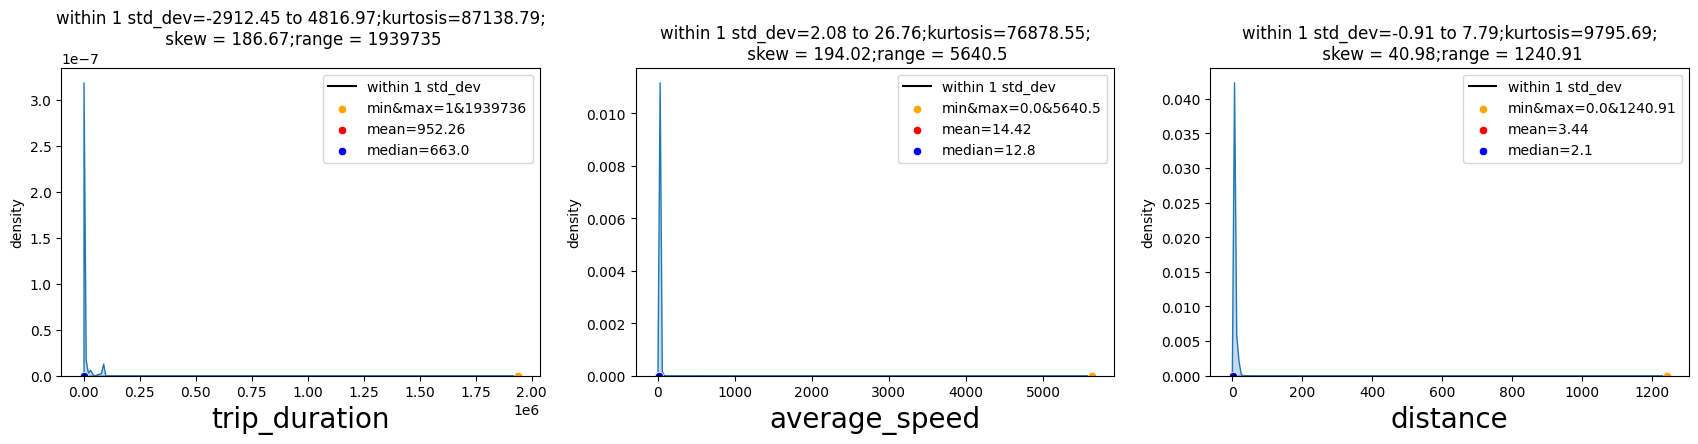

In [44]:
UVA_numeric(data, ['trip_duration', 'average_speed', 'distance'])

Can't depict anything due to the presence of outliers

In [45]:
data['trip_duration'].sort_values(ascending=False)


21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
323299          1
102646          1
566349          1
398887          1
512833          1
Name: trip_duration, Length: 729287, dtype: int64

In [46]:
print( data['trip_duration'].nlargest(10))

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
90557       86369
673847      86369
163178      86367
179065      86365
248675      86364
Name: trip_duration, dtype: int64


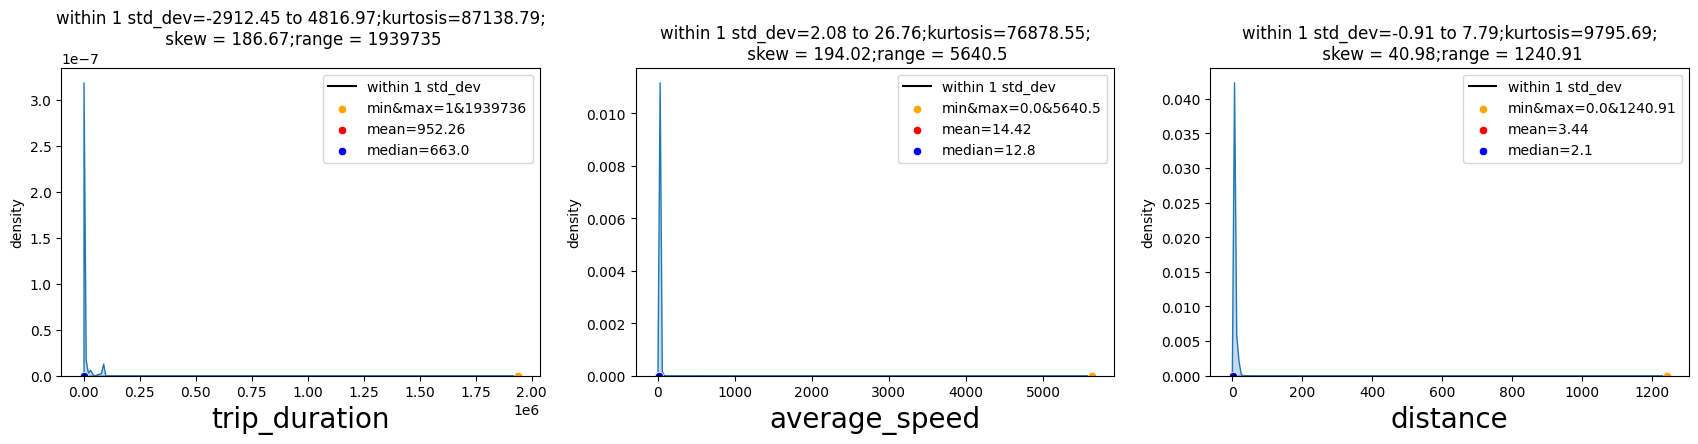

In [47]:
UVA_numeric(data, ['trip_duration', 'average_speed', 'distance'])

There are outliers present. the topmost value is way too big from 2nd and 3rd largets value. Let try gain after drpping this outlier

Text(0.5, 1.0, 'Distribution of the pickup ditribution after the treatment of outliers')

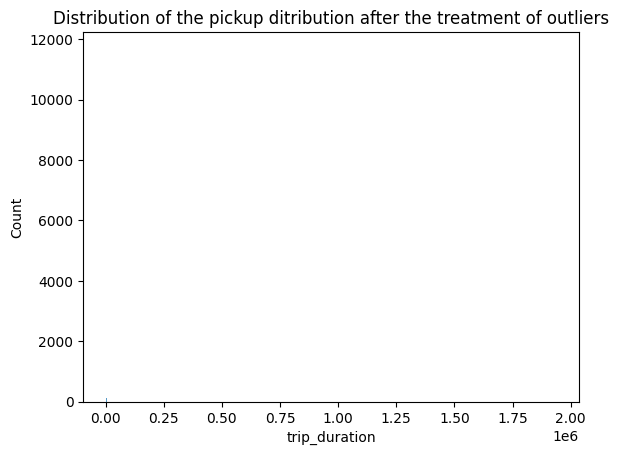

In [48]:
sns.histplot(data['trip_duration'])
plt.title('Distribution of the pickup ditribution after the treatment of outliers')

In [49]:
data['trip_duration'].max(), data['trip_duration'].min()

(1939736, 1)

Still it is skewed to the right, so lets customise the bins for better view

In [50]:
# Lets create bins for better view of histogram
bins=np.array([0,1800,3600,5400,7200,90000])

data['duration_time']=pd.cut(data.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])


In [51]:
print(data['duration_time'].value_counts())

duration_time
< 5      672856
5-10      50369
10-15      4574
>20        1091
15-20       396
Name: count, dtype: int64


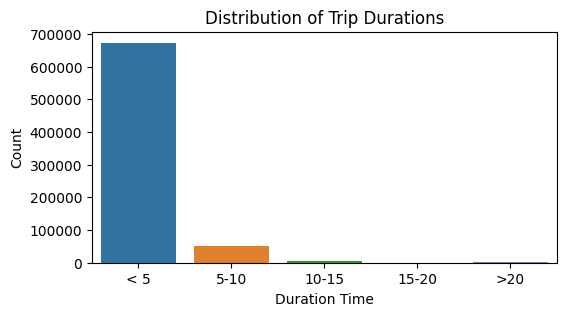

In [52]:

plt.figure(figsize=(6,3))
sns.countplot(data=data, x="duration_time", order=["< 5", "5-10", "10-15", "15-20", ">20"])
plt.xlabel("Duration Time")
plt.ylabel("Count")
plt.title("Distribution of Trip Durations")
plt.show()

* "< 5": Trip durations less than 1800 seconds (i.e., less than 5 minutes).
* "5-10": Trip durations between 1800 seconds (5 minutes) and 3600 seconds (10 minutes).
* "10-15": Trip durations between 3600 seconds (10 minutes) and 5400 seconds (15 minutes).
* "15-20": Trip durations between 5400 seconds (15 minutes) and 7200 seconds (20 minutes).
* ">20": Trip durations greater than or equal to 7200 seconds (20 minutes).

Inference : most of trips lie in <5 mins and 5-10 mins

# Bivariate Analysis

Target variable is trip_duration (continuous variable) and derived variable from it is duration_time (Categorical)

In [53]:
data_numerical = data.select_dtypes(include=['int64', 'float64', 'Int64'])

In [54]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
pickup_day                    object
dropoff_day                   object
pickup_day_no                  int32
dropoff_day_no                 int32
pickup_month                  object
dropoff_month                 object
pickup_hour                    int32
dropoff_hour                   int32
pickup_minute                  int32
dropoff_minute                 int32
pickup_timeofday              object
dropoff_timeofday             object
distance                     float64
average_speed                float64
duration_time               category
dtype: object

In [55]:
data_numerical.dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
distance             float64
average_speed        float64
dtype: object

In [56]:
# calculating correlation
correlation = data_numerical.corr()
correlation

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,average_speed
vendor_id,1.000000,0.286465,0.008202,0.002846,0.002365,0.005240,0.027754,0.006521,0.001312
passenger_count,0.286465,1.000000,0.001162,-0.004698,-0.000038,-0.003948,0.013017,0.009166,-0.002661
pickup_longitude,0.008202,0.001162,1.000000,0.047669,0.780642,0.118504,0.035448,0.251497,0.095289
pickup_latitude,0.002846,-0.004698,0.047669,1.000000,0.120007,0.479298,-0.038169,-0.128478,0.116813
dropoff_longitude,0.002365,-0.000038,0.780642,0.120007,1.000000,0.149625,0.020667,0.132384,0.045974
dropoff_latitude,0.005240,-0.003948,0.118504,0.479298,0.149625,1.000000,-0.028289,-0.153774,-0.054278
trip_duration,0.027754,0.013017,0.035448,-0.038169,0.020667,-0.028289,1.000000,0.125765,-0.028199
distance,0.006521,0.009166,0.251497,-0.128478,0.132384,-0.153774,0.125765,1.000000,0.575059
average_speed,0.001312,-0.002661,0.095289,0.116813,0.045974,-0.054278,-0.028199,0.575059,1.000000


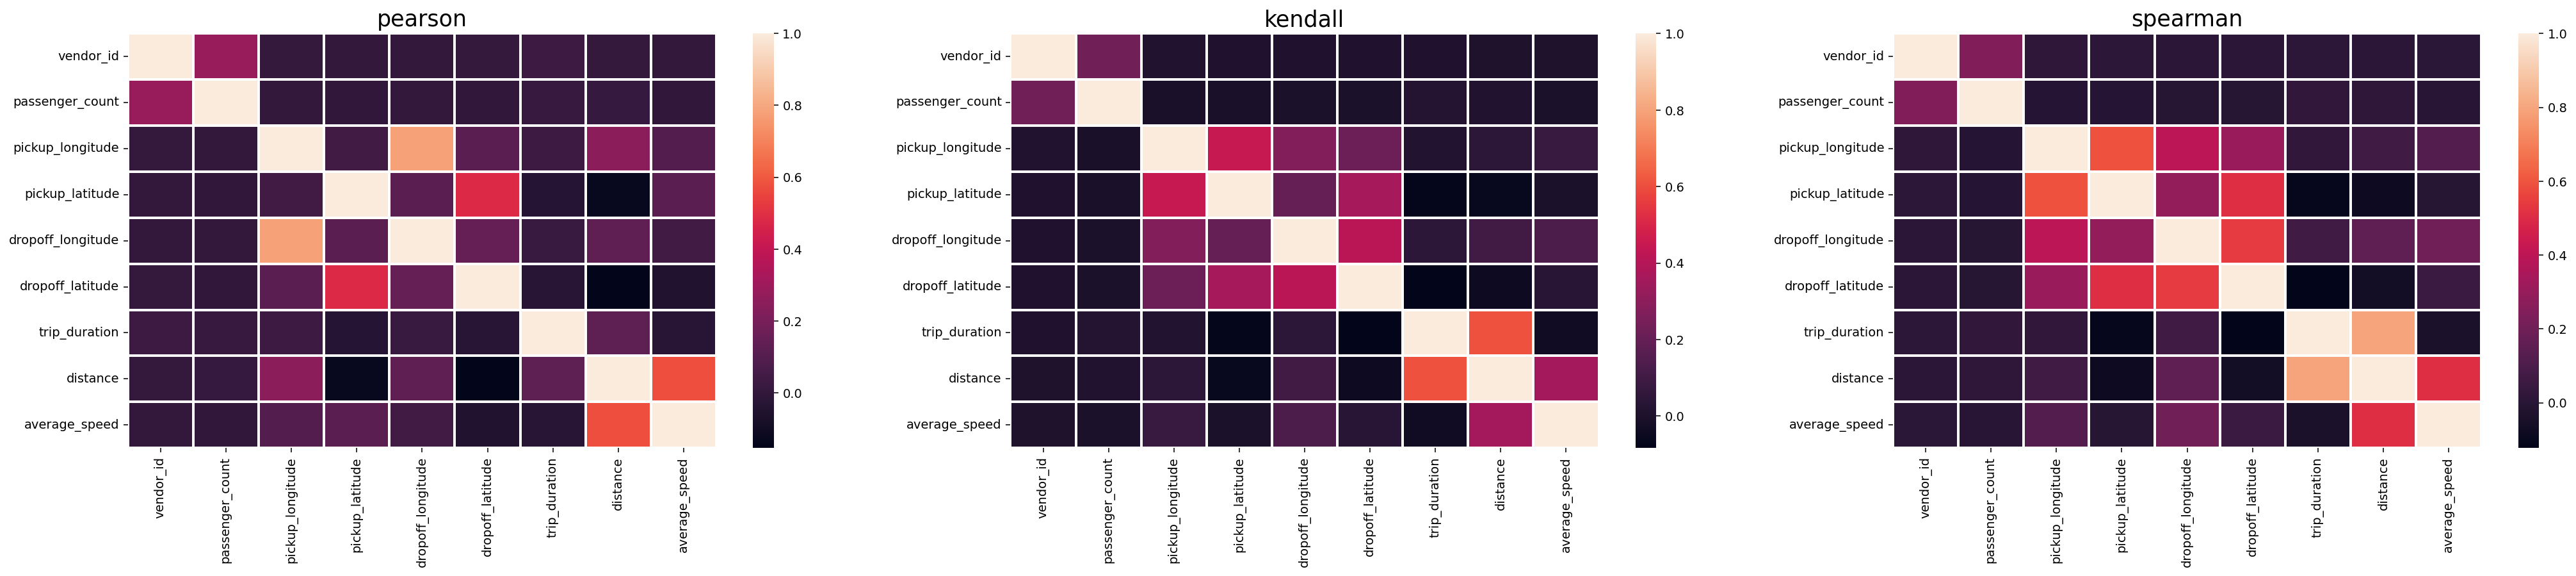

In [57]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = data_numerical.corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

## Observations:
* Kendall and speaman has similar graphs
* not much correlation observed here.

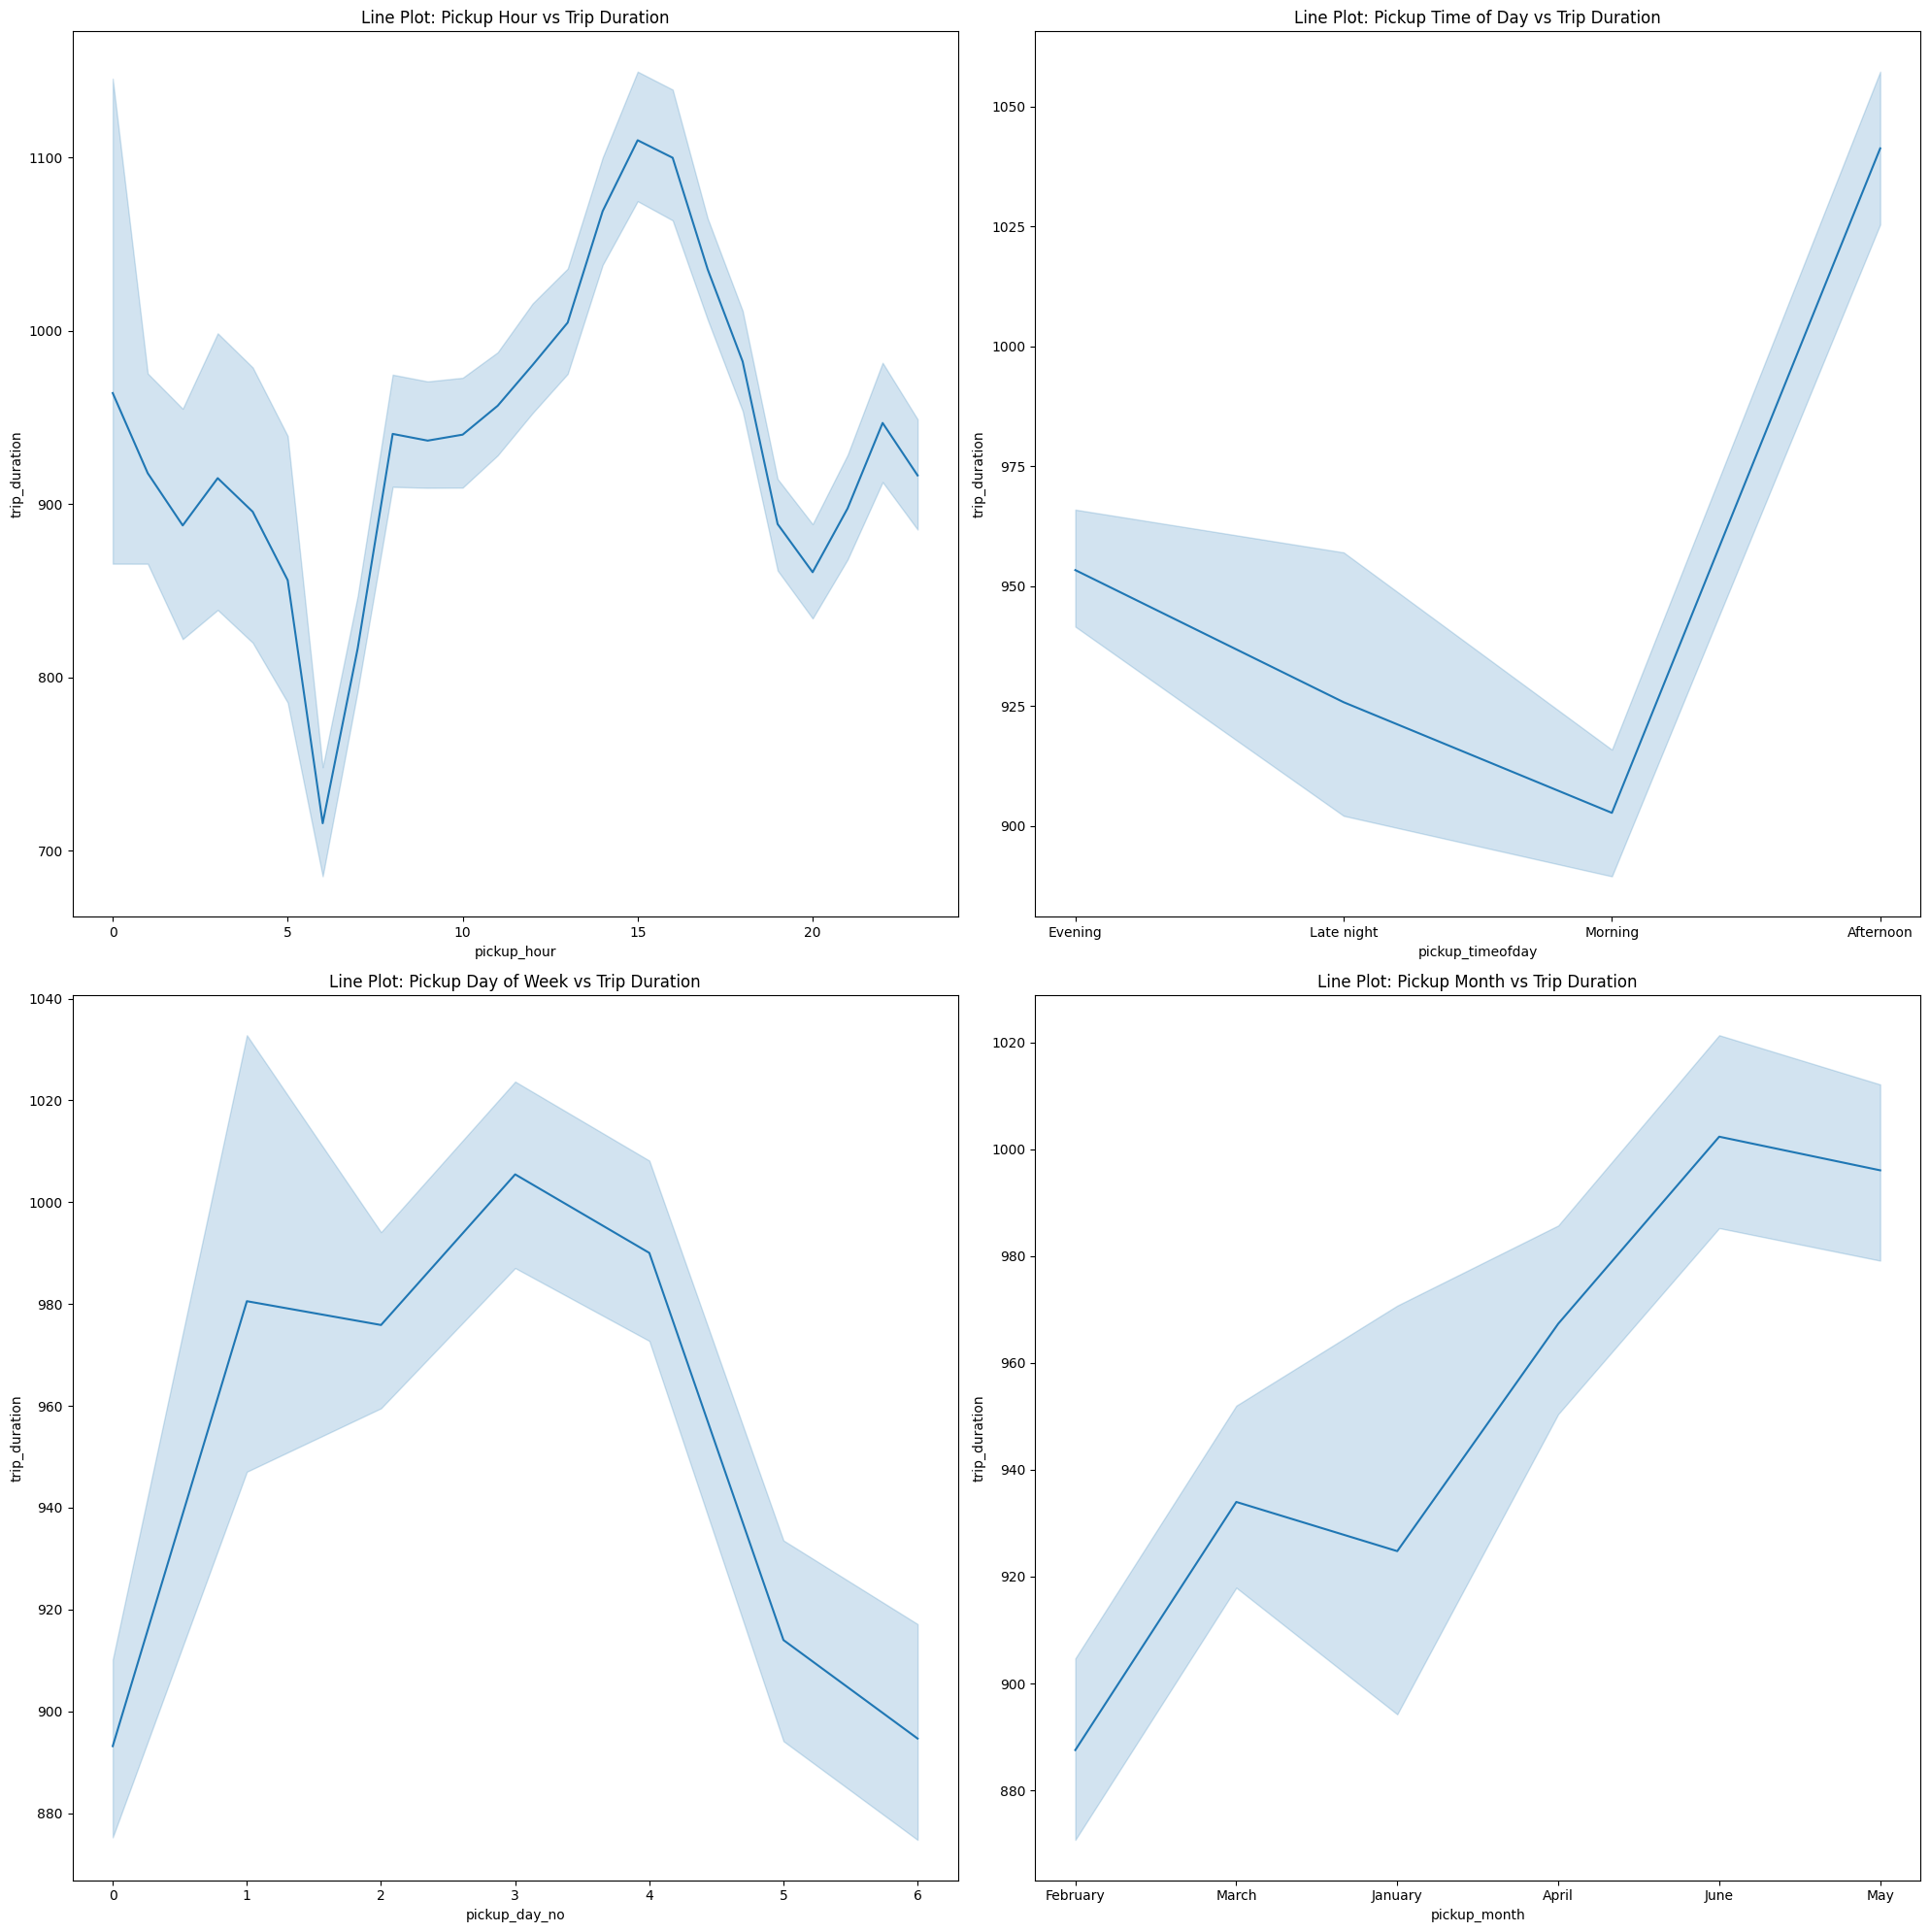

In [58]:
figure, ((ax11, ax12), (ax21, ax22)) = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))

sns.lineplot(x='pickup_hour', y='trip_duration', data=data, ax=ax11)
ax11.set_title('Line Plot: Pickup Hour vs Trip Duration')

sns.lineplot(x='pickup_timeofday', y='trip_duration', data=data, ax=ax12)
ax12.set_title('Line Plot: Pickup Time of Day vs Trip Duration')

sns.lineplot(x='pickup_day_no', y='trip_duration', data=data, ax=ax21)
ax21.set_title('Line Plot: Pickup Day of Week vs Trip Duration')

sns.lineplot(x='pickup_month', y='trip_duration', data=data, ax=ax22)
ax22.set_title('Line Plot: Pickup Month vs Trip Duration')

plt.tight_layout()
plt.show()

We see theWe see the trip duration is the maximum around 3 pm which may be because of traffic on the roads.
Trip duration is the lowest around 6 am as streets may not be busy

As we saw above, trip duration is the maximum in the afternoon and lowest between late night and morning.


Trip duration is the longest on Thursdays closely followed by Fridays.

From February, we can see trip duration rising every month.

##### Hypothesis :
* Is average speed for both Vendors different?
* Is the trip duration for both Vendors different?
* Is the distance for both Vendors different?

In [59]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [60]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [61]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.std()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot(x=[str(category),'not {}'.format(category)],y= [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

### Is average speed for both Vendors different?

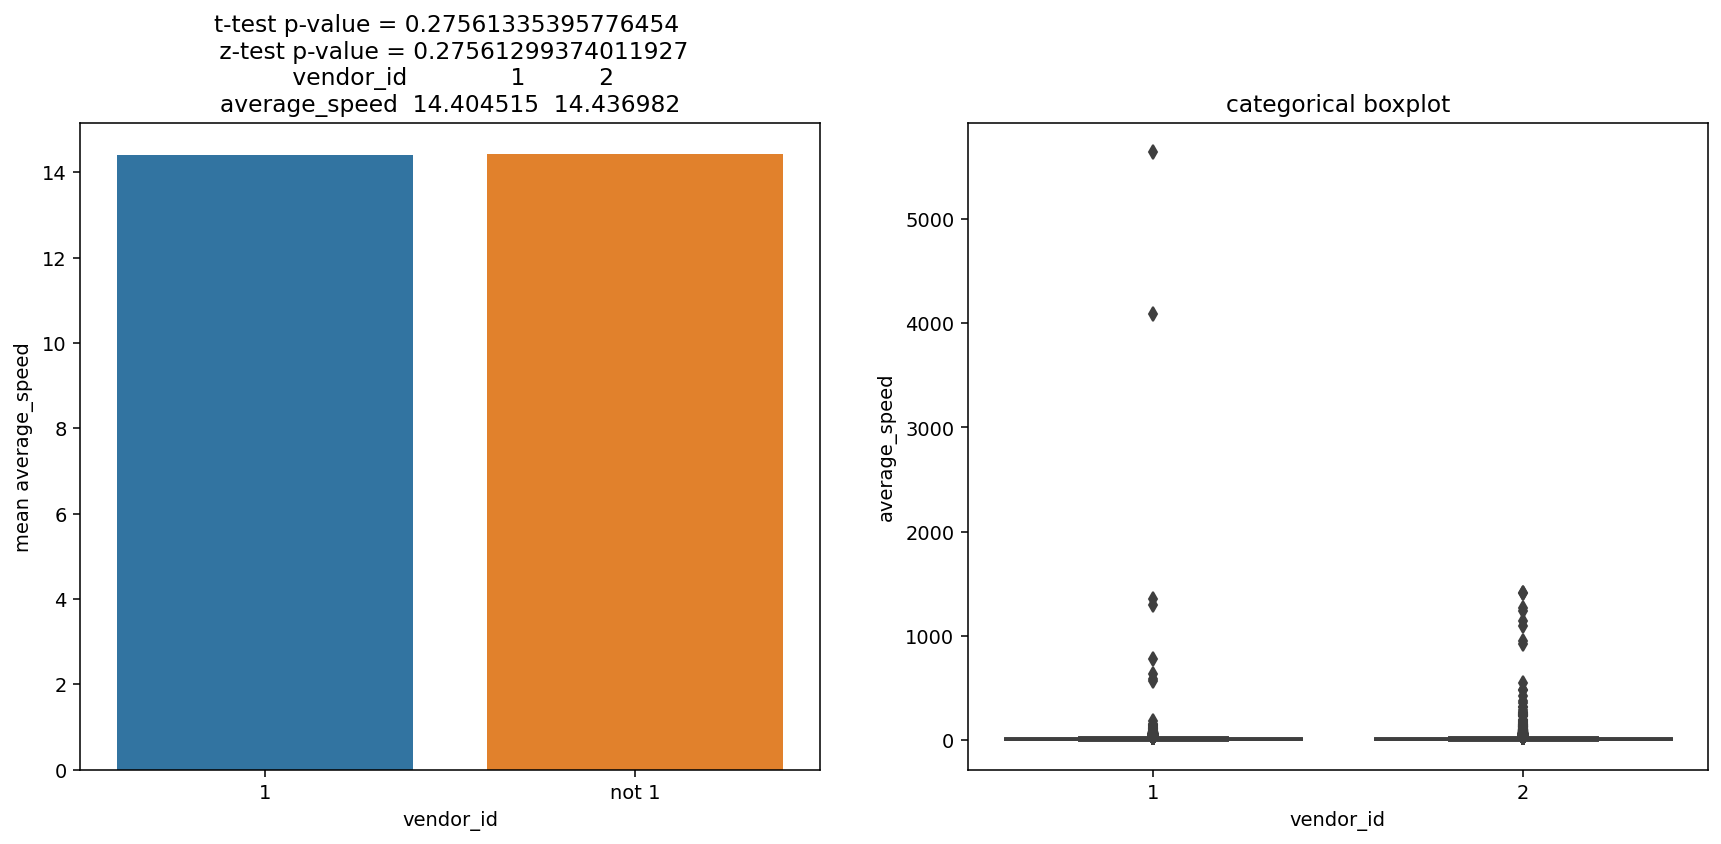

In [62]:
Bivariate_cont_cat(data,'average_speed','vendor_id',1)

As p value is greater than 0.05, we fail to reject the null hypothesis. 
Also there is no Significant change in average speed for both the Vendors.

In [63]:
### Is the trip duration for both Vendors different?

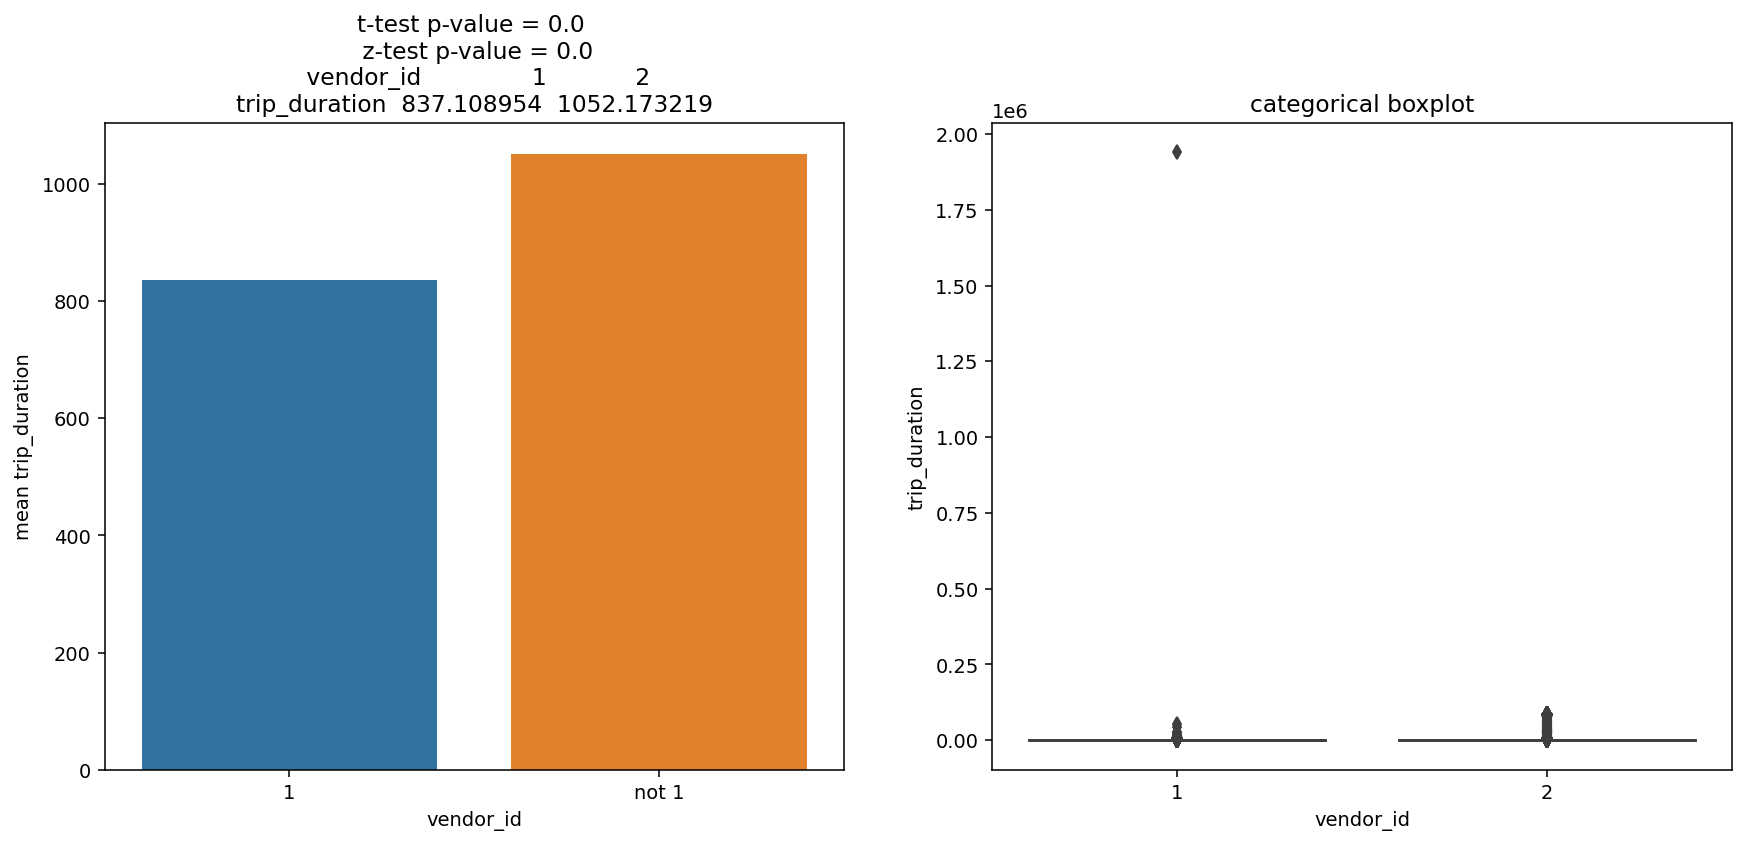

In [64]:
Bivariate_cont_cat(data,'trip_duration','vendor_id',1)

Yes, Vendor 2 has more trips in comparisn to vendor 1. 
Also, We can see a lot of Outliers in our Dataset.

### Is the distance for both Vendors different?

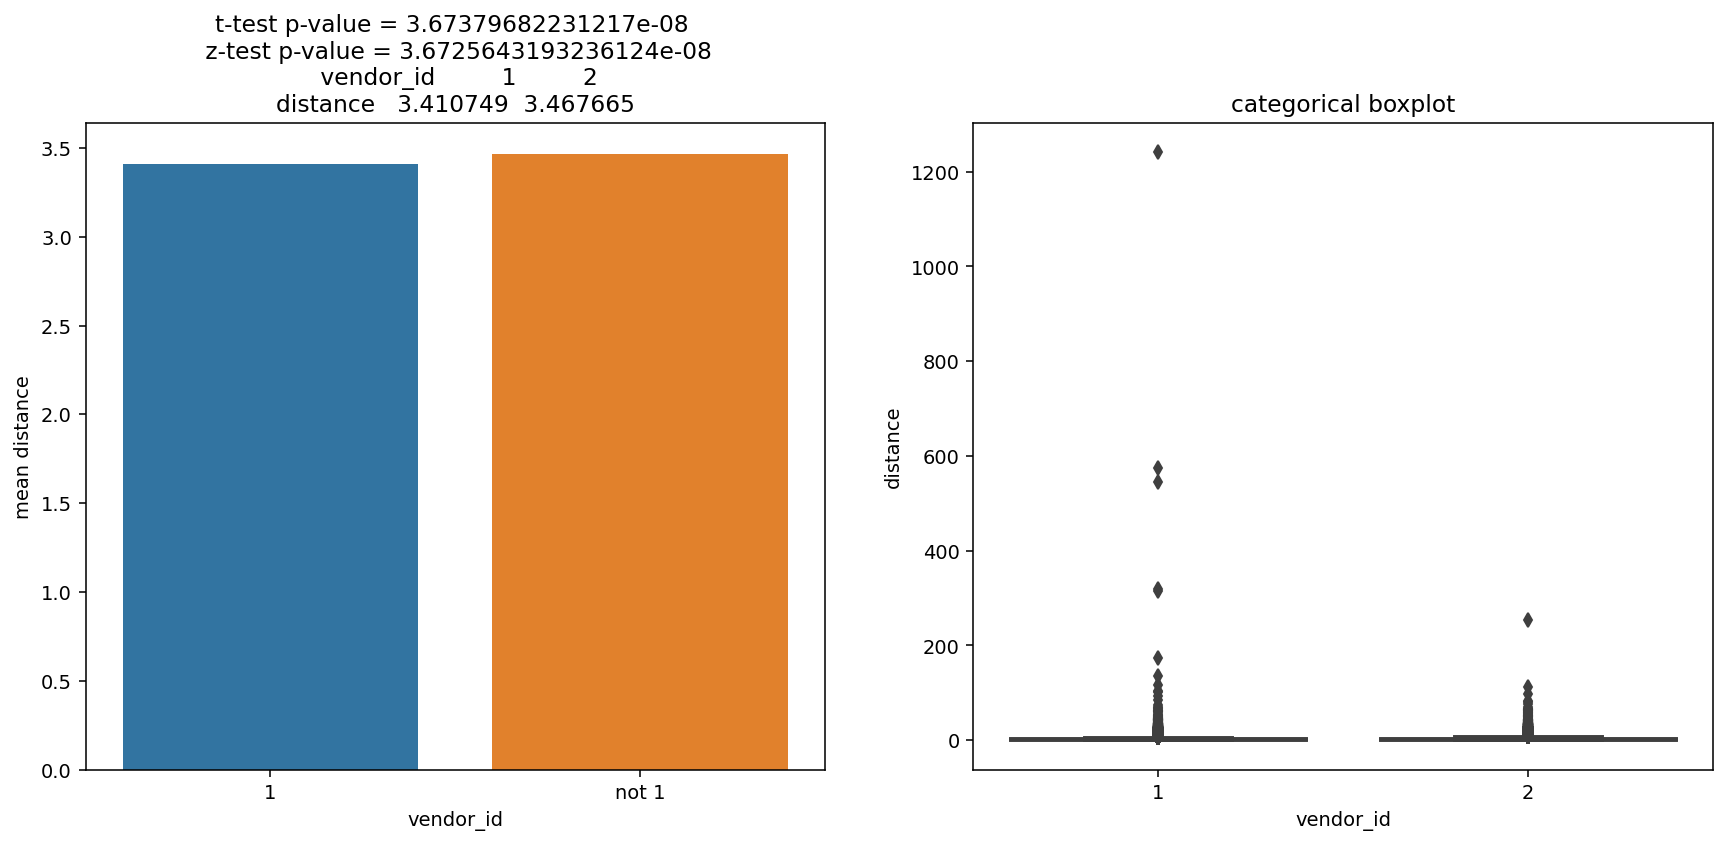

In [65]:
Bivariate_cont_cat(data,'distance','vendor_id',1)

There is no significant difference

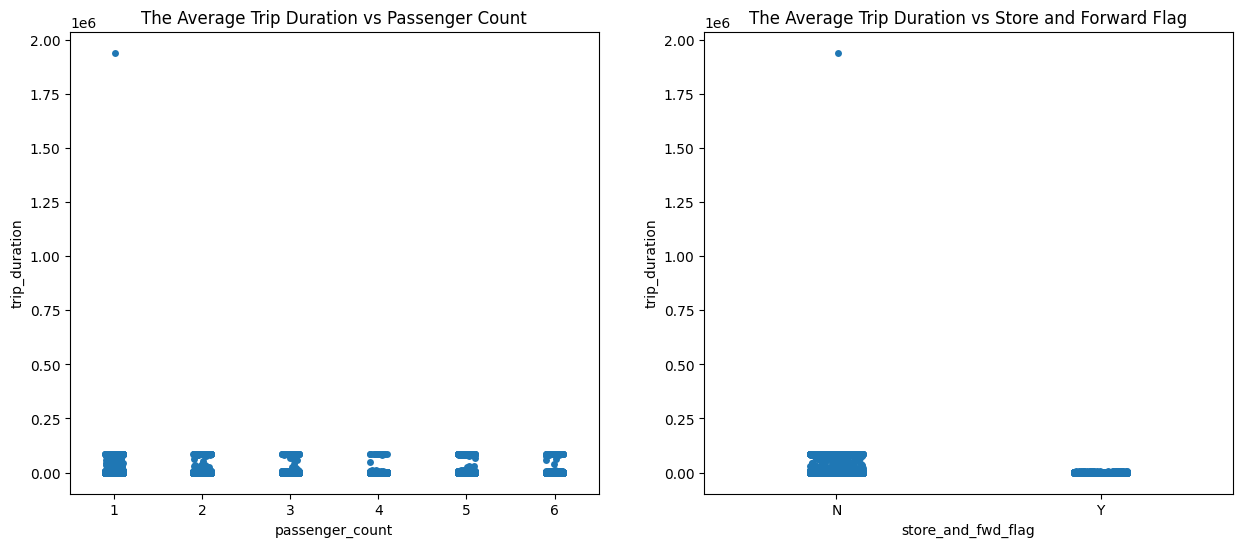

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Trip Duration vs Passenger Count
sns.stripplot(y='trip_duration', x='passenger_count', data=data, ax=ax[0])
ax[0].set_title('The Average Trip Duration vs Passenger Count')

# Plot 2: Trip Duration vs Store and Forward Flag
sns.stripplot(x='store_and_fwd_flag', y='trip_duration', data=data, ax=ax[1])
ax[1].set_title('The Average Trip Duration vs Store and Forward Flag')

# Show the plots
plt.show()


### The relationship between Trip Duration and day/time of the week

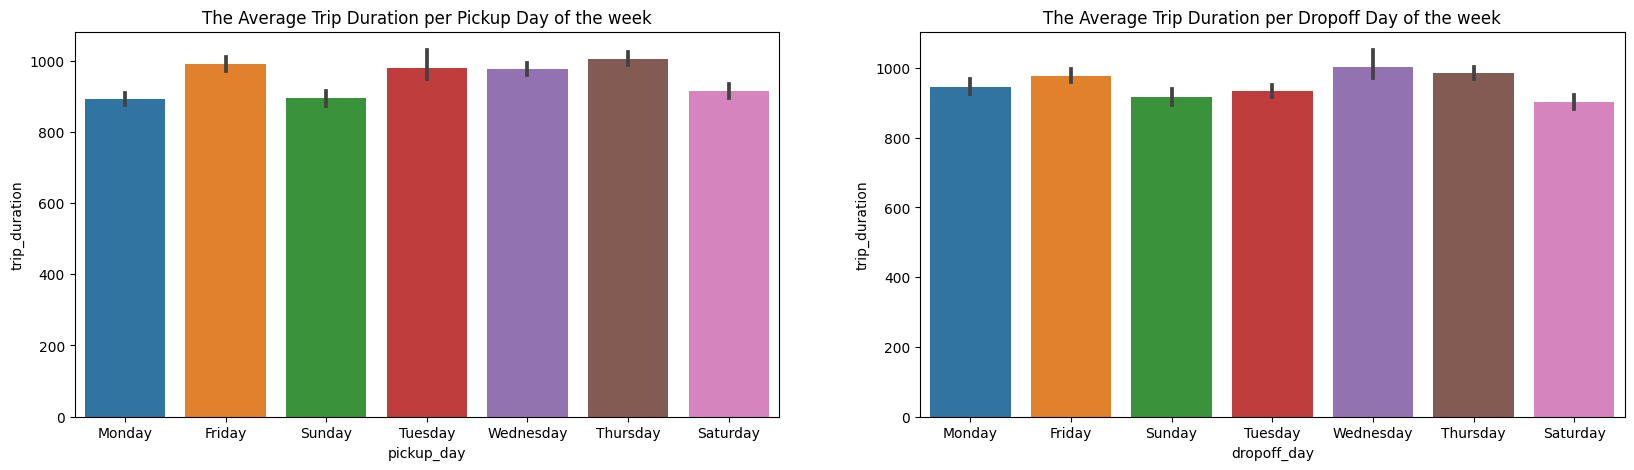

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Plot 1: Average Trip Duration per Pickup Day of the week
sns.barplot(x="pickup_day", y="trip_duration", data=data, ax=ax[0])
ax[0].set_title('The Average Trip Duration per Pickup Day of the week')

# Plot 2: Average Trip Duration per Dropoff Day of the week
sns.barplot(x="dropoff_day", y="trip_duration", data=data, ax=ax[1])
ax[1].set_title('The Average Trip Duration per Dropoff Day of the week')

# Show the plots
plt.show()


The graphs denote the average estimate of a trip for each day of the week. The error bars provides some indication of the uncertainty around that estimate

Thus the highest avg time taken to complete a trip is on Thursday while Monday, Saturday and Sunday takes the least time.

But this is not enough. We must also take into consideration the percentage of short, medium and long trips taken on each day.



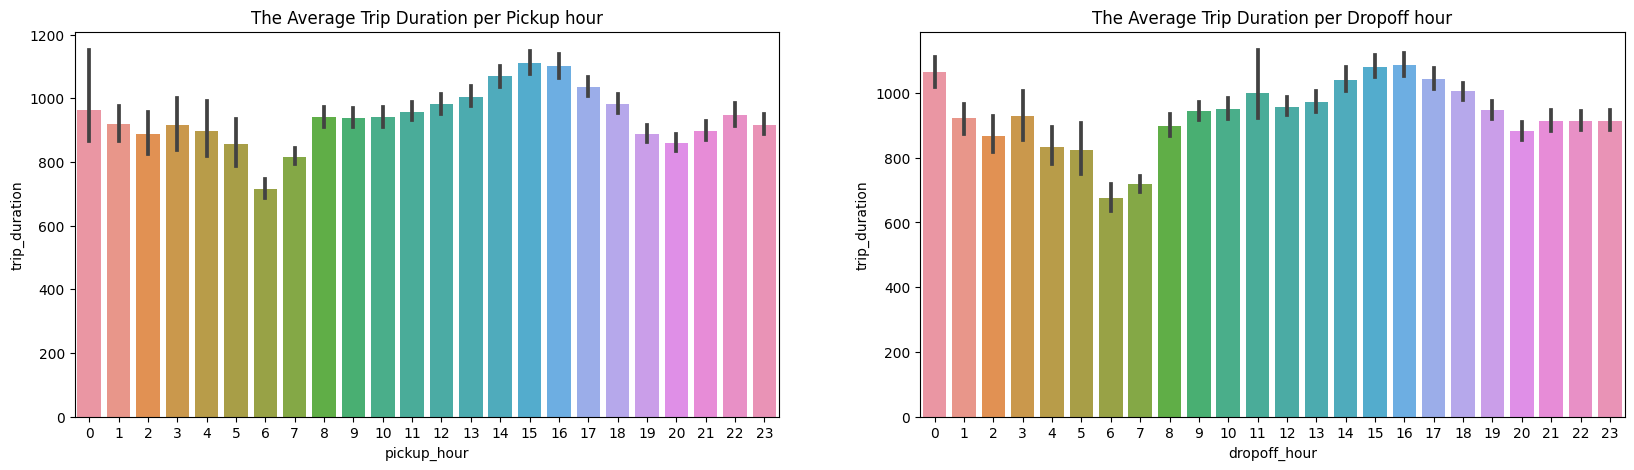

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Plot 1: Average Trip Duration per Pickup hour 
sns.barplot(x="pickup_hour", y="trip_duration", data=data, ax=ax[0])
ax[0].set_title('The Average Trip Duration per Pickup hour')

# Plot 2: Average Trip Duration per Dropoff hour
sns.barplot(x="dropoff_hour", y="trip_duration", data=data, ax=ax[1])
ax[1].set_title('The Average Trip Duration per Dropoff hour')

# Show the plots
plt.show()

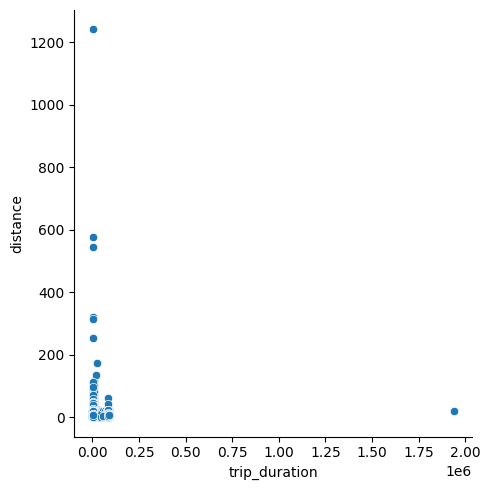

In [69]:
sns.relplot(y=data.distance,x='trip_duration',data=data)

We can see even though distance is recorded as 0 but trip duration is definitely more.

One reason can
One reason can be that the dropoff coordinates weren’t recorded.
Another reason one can think is that for short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.


Text(0.5, 1.0, 'A compared distribution of trips > 5 hours')

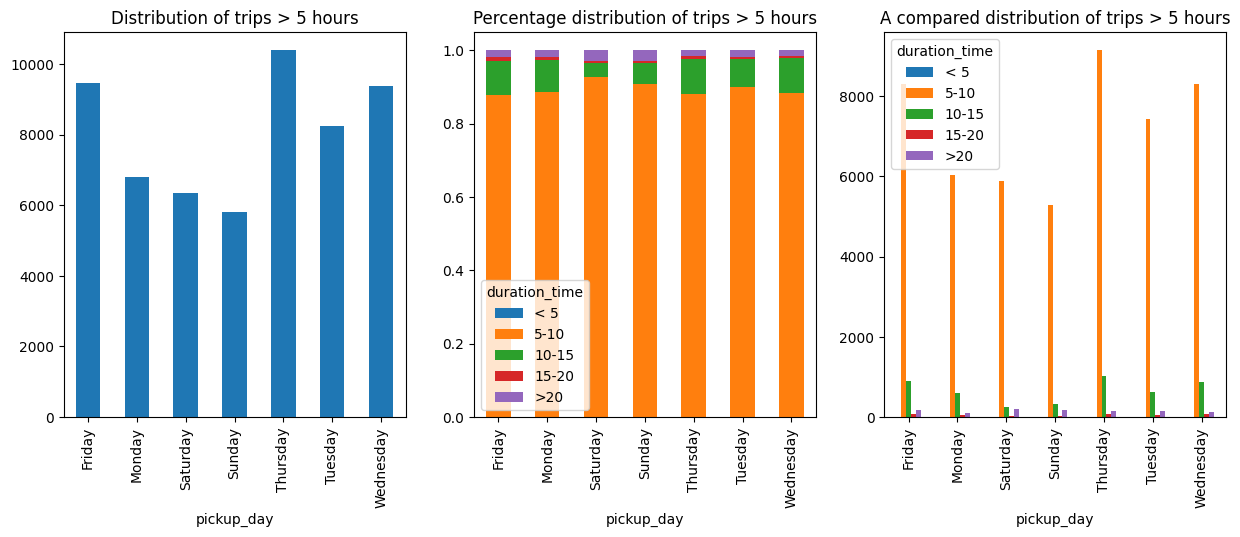

In [70]:
figure,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=data[(data.duration_time !="< 5")].groupby('pickup_day')['duration_time'].count()
ax1.plot(kind='bar',ax=ax[0])
ax[0].set_title('Distribution of trips > 5 hours')
ax2=data[(data.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax2.plot(kind='bar', stacked='True',ax=ax[1])
ax[1].set_title('Percentage distribution of trips > 5 hours')
ax3=data[(data.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts().unstack()
ax3.plot(kind='bar',ax=ax[2])
ax[2].set_title('A compared distribution of trips > 5 hours')

The 3 graphs
The 3 graphs present 3 types of information here:

The left most graph shows a frequency distribution of the number of trips(> 5 hours ) taken on each day of the week

The middle one shows a percentage distribution of the trips of different duration ( > 5 hours )within each day of the week.

The right one shows the frequency distribution of the trips of different duration (> 5 hours)within each day of the week.

Some key points :

The most number trips which lasts > 5 hours were taken on Thursday followed by Friday and Wednesday.(Left graph)
The most number of trips of duration 5–10, 10–15 was taken on Thursday.(right graph)
But the highest percentage of trips longer than 20 hours was taken on Sunday and Saturday.(middle graph)

The highest average time taken to complete a trip are for trips started in midday(between 14 and 17 hours) and the least are the ones taken in the early morning(between 6–7 hours)

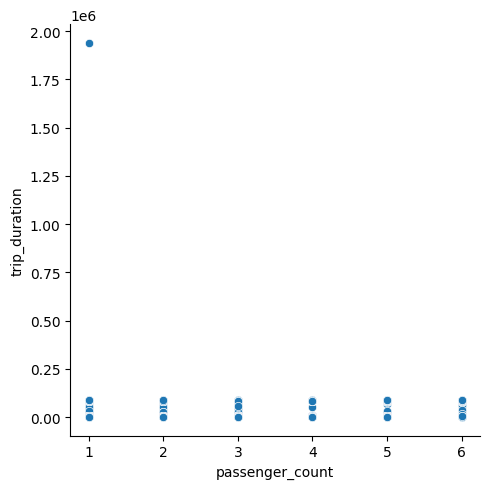

In [71]:
sns.relplot(x="passenger_count", y="trip_duration", data=data, kind="scatter")


Here we see, passenger count has no such relationship with trip duration. 

<Axes: xlabel='vendor_id', ylabel='passenger_count'>

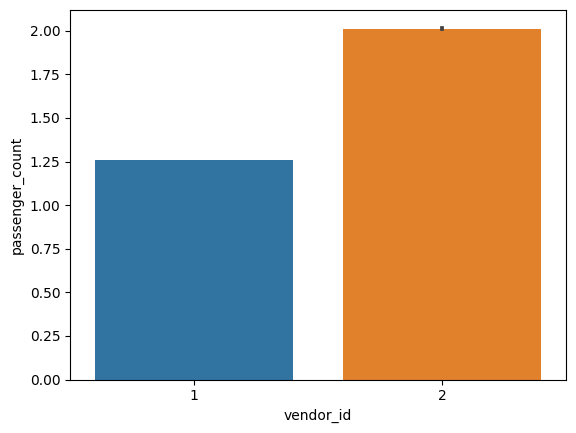

In [72]:
sns.barplot(x='vendor_id',y='passenger_count', data=data)

## Multivariate

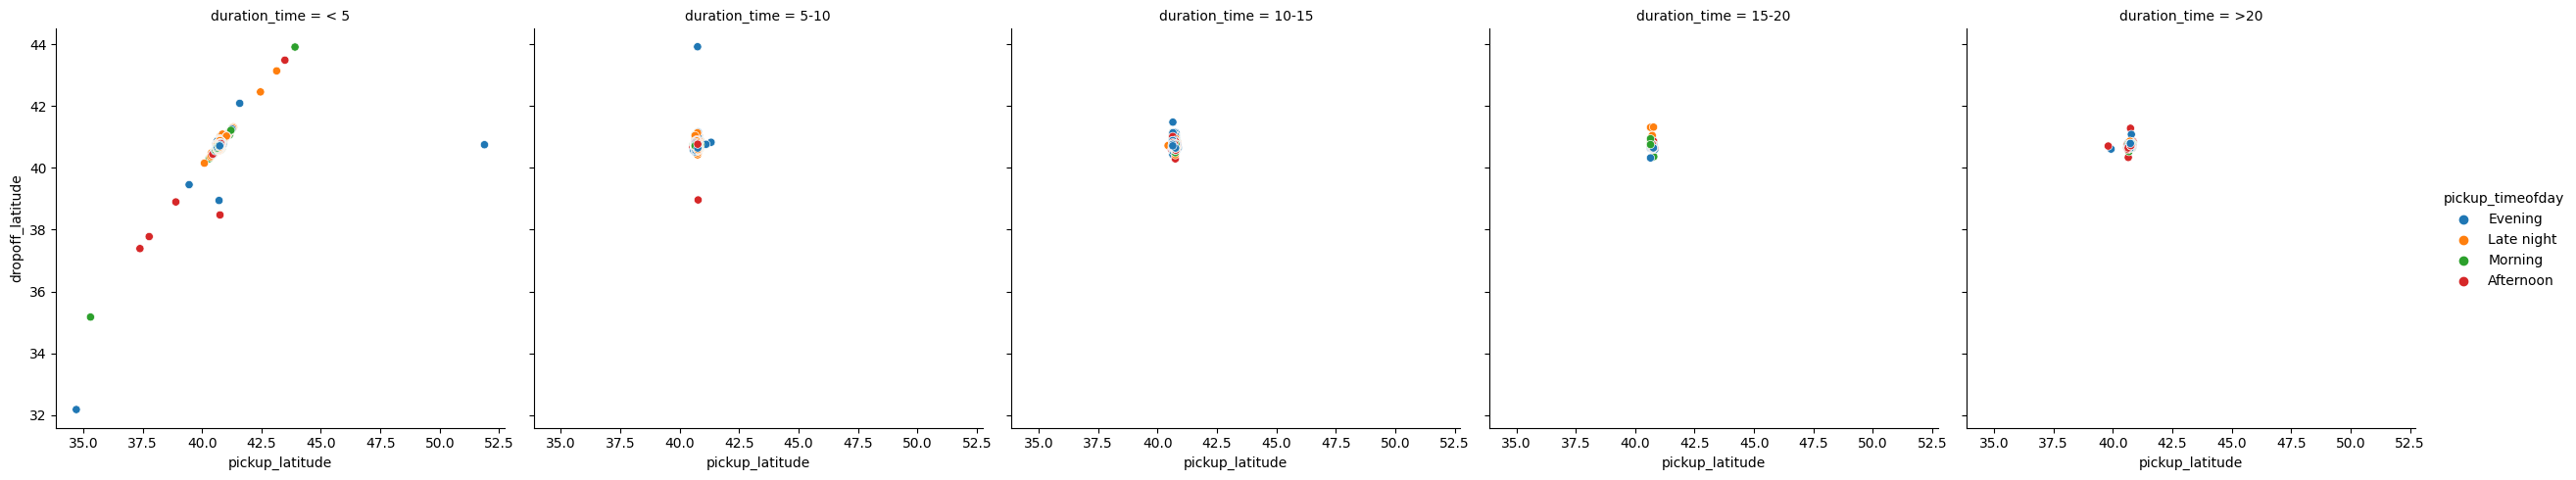

In [73]:
sns.relplot(x="pickup_latitude", y="dropoff_latitude",hue='pickup_timeofday',  col='duration_time', data=data);

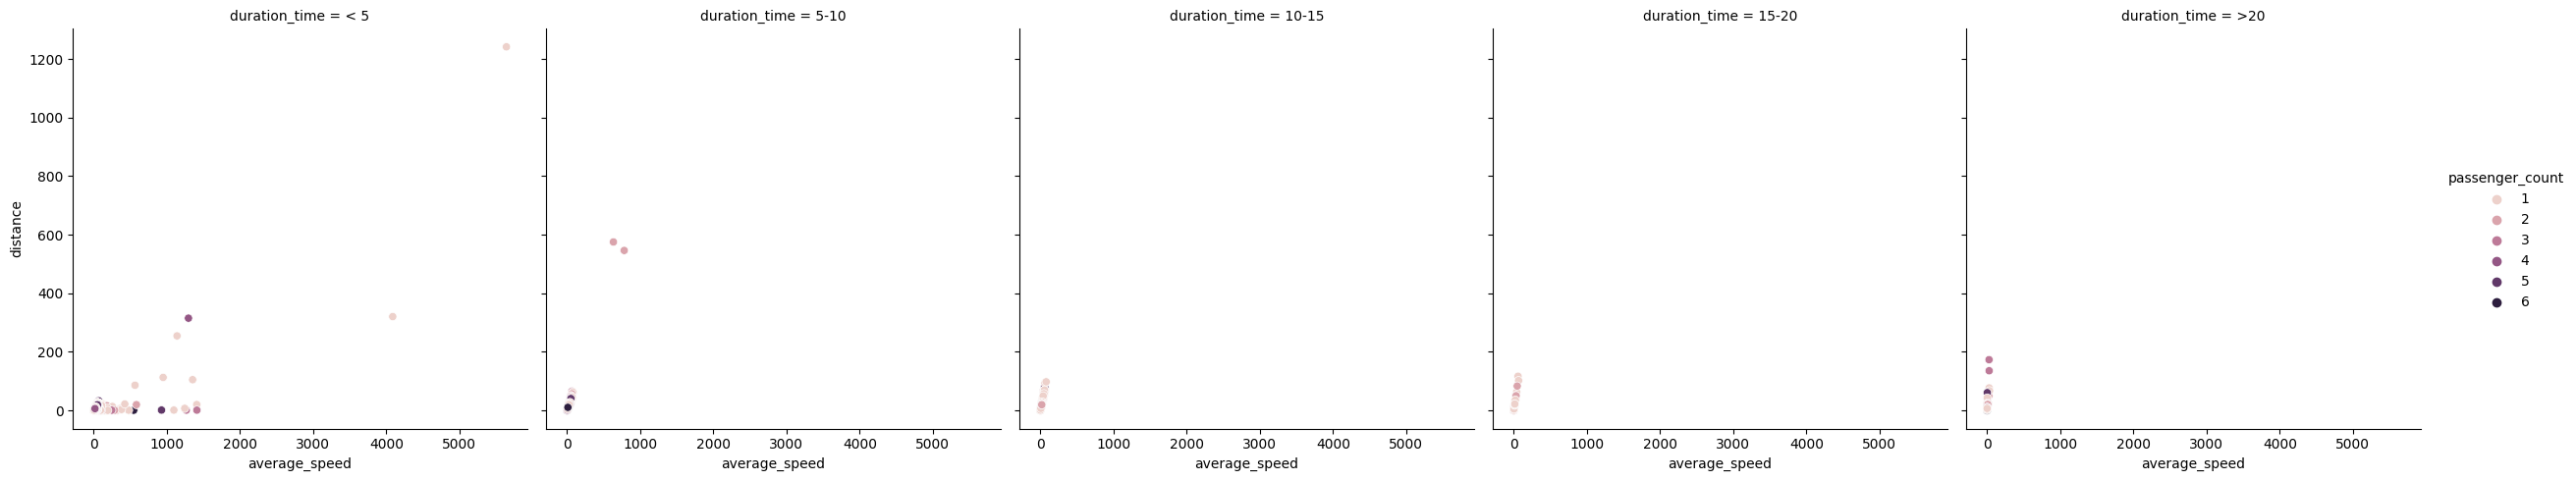

In [74]:
sns.relplot(x="average_speed", y="distance",hue='passenger_count',  col='duration_time', data=data);